In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import Evaluation as Evaluation2
import Recommenders as Recommenders

In [2]:
# Read the data and drop unwanted column timeStamp
df=pd.read_csv("ratings_Electronics.csv",names=["userId","productId","ratings","timeStamp"])
df=df.drop(columns="timeStamp")

In [3]:
# Take users who have rated atleast 50 products
df["eY"]=df.groupby("userId")["productId"].transform('count')
df_a=df[df["eY"]>=50]

df_a.drop(columns="eY",inplace=True)
#df_a.reset_index(inplace=True)

C:\Users\kalya\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [4]:
# Reset the index
df_a.reset_index(drop=True,inplace=True)

In [5]:
df_a.head()

,userId,productId,ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,AT09WGFUM934H,0594481813,3.0
2,A32HSNCNPRUMTR,0970407998,1.0
3,A17HMM1M7T9PJ1,0970407998,4.0
4,A3CLWR1UUZT6TG,0972683275,5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191D5ADAC50>]],
      dtype=object)

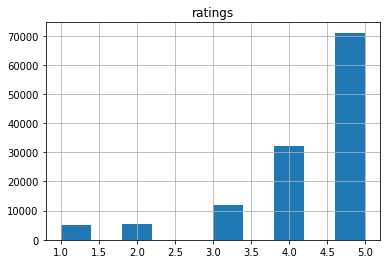

In [6]:
# Check the distribution of ratings
df_a.hist()

In [7]:
# Create dataframe with unique products
df_p=pd.DataFrame(df_a["productId"].unique(),columns=["productId"])

In [8]:
df_p.head()

,productId
0,0594451647
1,0594481813
2,0970407998
3,0972683275
4,1400501466


In [9]:
# Split the dataset into 70:30
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_a, test_size = 0.30, random_state=0)

In [10]:
# Invoke the popularity recommender function
pm = Recommenders.popularity_recommender_py()

In [11]:
pm.create(train_data, 'userId', 'productId')

In [12]:
# Test for one particular ID
user_id = 'A3BY5KCNQZXV5U'
pm.recommend(user_id)

,userId,productId,score,Rank
30847,A3BY5KCNQZXV5U,B0088CJT4U,133,1.0
30287,A3BY5KCNQZXV5U,B007WTAJTO,124,2.0
19647,A3BY5KCNQZXV5U,B003ES5ZUU,122,3.0
8752,A3BY5KCNQZXV5U,B000N99BBC,114,4.0
30555,A3BY5KCNQZXV5U,B00829THK0,97,5.0
30559,A3BY5KCNQZXV5U,B00829TIEK,97,6.0
17384,A3BY5KCNQZXV5U,B002R5AM7C,94,7.0
31107,A3BY5KCNQZXV5U,B008DWCRQW,91,8.0
17573,A3BY5KCNQZXV5U,B002SZEOLG,84,9.0
22744,A3BY5KCNQZXV5U,B004CLYEDC,82,10.0


In [13]:
# Invoke the collaborative filtering model
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'userId', 'productId')

In [14]:
#Print the songs for the user in training data
user_id = 'A3BY5KCNQZXV5U'
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user userid: A3BY5KCNQZXV5U:
------------------------------------------------------------------------------------
B000QUUFRW
B002K450RM
B006JPGM48
B000AM6QH4
B0076AUCKU
B0000CDJP8
B00603RU9A
0594451647
B002K7ULJQ
B003XM1WE0
B003Y06336
B004OOTRPC
B003Y60DZO
B003VAHYNC
B005B47AIU
B004EGI3CI
B000063574
B007PTCFFW
B003XM73P2
B002ISXBFI
B00BN1Q5JA
B0031AQ302
B00BGGDVOO
B004NY9UV4
B009LL9VDG
B003L139HG
B008UMF3T8
B0015S8PGW
B000X5ZVS8
B000OMKR8E
B004WYA852
B004EHSP3Y
B00000JD4V
B00963S6TE
B000VM60I8
B007IVW15Q
B002K450QI
B000MYOJMY
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique products for the user: 38
no. of unique products in the training set: 38226
Non zero values in cooccurence_matrix :17949


,userId,productId,score,rank
0,A3BY5KCNQZXV5U,B0000AI1H7,0.016447,1
1,A3BY5KCNQZXV5U,B0030GGS3O,0.016447,2
2,A3BY5KCNQZXV5U,B003JTHMQO,0.016447,3
3,A3BY5KCNQZXV5U,B009AR2KUM,0.016447,4
4,A3BY5KCNQZXV5U,B00AHXXFHA,0.016447,5
5,A3BY5KCNQZXV5U,B000CBCV2W,0.016447,6
6,A3BY5KCNQZXV5U,B003PJ6G5Q,0.016447,7
7,A3BY5KCNQZXV5U,B0010HDY9Q,0.016447,8
8,A3BY5KCNQZXV5U,B002ECW7O4,0.016447,9
9,A3BY5KCNQZXV5U,B004D7K5LA,0.016447,10


In [19]:
# Comparing the popularity and collaborative models and testing for 1% of the dataset
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.01

#Instantiate the precision_recall_calculator class
pr = Evaluation2.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:1540
Length of user sample:15
Getting recommendations for user:A3EHJ5519LG7TR
No. of unique products for the user: 29
no. of unique products in the training set: 38226
Non zero values in cooccurence_matrix :7217
Getting recommendations for user:A3TR3KLL5PXSZ8
No. of unique products for the user: 39
no. of unique products in the training set: 38226
Non zero values in cooccurence_matrix :7074
Getting recommendations for user:A3J8A5L5AF5TX9
No. of unique products for the user: 126
no. of unique products in the training set: 38226
Non zero values in cooccurence_matrix :76854
Getting recommendations for user:AHROSV6WJOEGY
No. of unique products for the user: 45
no. of unique products in the training set: 38226
Non zero values in cooccurence_matrix :15767
Getting recommendations for user:A3K91X9X2ARDOK
No. of unique products for the user: 42
no. of unique products in the training set: 38226
Non zero values in cooccurence_matrix :25672
Getting recommendations 

In [25]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.01])
    pl.xlim([0.0, 0.02])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


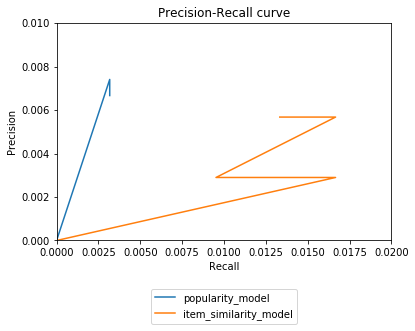

In [26]:
# Model comparison and evaluation
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

In [10]:
# Create the DF by pivoting the columns
R_df = df_a.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
R_df.tail()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZCE11PSTCH1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZMY6E8B52L2T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZNUHQSHZHSUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZOK5STV85FBJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from scipy.sparse.linalg import svds
#singluar value decomposition
#Compute the largest k singular values/vectors for a sparse matrix.
#k: Number of singular values and vectors to compute. Must be 1 <= k < min(R_df.shape)
# R_df is to compute the SVD on
# The singular values - sigma
U, sigma, Vt = svds(R_df, k = 5)

In [12]:
sigma = np.diag(sigma)

In [15]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns,index=R_df.index.values)

In [16]:
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
A100UD67AHFODS,0.003392,0.005101,0.003110,0.014036,0.004347,0.003235,0.002712,0.000683,0.014522,0.002892,...,0.000628,0.045273,0.004108,0.065339,0.004514,0.007016,0.002378,0.149812,0.056574,0.015333
A100WO06OQR8BQ,0.002301,0.002763,0.004931,0.020029,0.009944,0.001969,0.011179,0.002130,0.010814,0.001776,...,0.000567,0.010756,0.002047,-0.011471,0.007097,-0.001310,0.003282,-0.027182,-0.011699,0.001592
A105S56ODHGJEK,-0.001665,-0.003039,0.002403,0.012232,0.006044,-0.002258,0.006311,0.002968,-0.004614,-0.001742,...,-0.000316,0.007457,-0.002645,-0.021967,0.016302,-0.002753,-0.000616,-0.018615,-0.011839,-0.006263
A105TOJ6LTVMBG,0.002522,0.003514,0.001841,0.007227,0.003489,0.002573,0.004060,-0.000115,0.009802,0.002169,...,0.000543,0.001348,0.002789,0.001661,-0.003795,0.000373,0.002574,-0.012402,-0.003682,0.004147
A10AFVU66A79Y1,0.000647,0.000271,0.001764,0.011201,0.005150,0.000247,0.005291,0.001642,0.002863,0.000320,...,0.000091,0.000177,0.000035,-0.016592,0.007257,-0.001789,0.001092,-0.025153,-0.013190,-0.001824


In [65]:
# return the products with the highest predicted rating that the specified user hasn’t already rated
#Take specific user row from matrix from predictions
def recommend_products_simple(predictions_df, userId, original_ratings_df,products_df, num_recommendations=5):
    
    # Get and sort the user's predictions

    sorted_user_predictions = predictions_df.loc[userId].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userId)]


    print ('User {0} has already rated {1} products.'.format(userId, user_data.shape[0]))
    print ('Recommending the highest {0} predicted ratings products not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating products that the user hasn't reviewed yet.
    # select the product which are in user list and remove those products from our products list
    # Then merge with the sorted user predictions with the productIds with left join
    # Rename the columns to 'predictions'
    recommendations = (products_df[~products_df['productId'].isin(user_data['productId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'productId', right_on = 'productId').
         rename(columns = {userId: 'Predictions'}))
    #sort the prediction values
    recommendations = (recommendations.sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :]
                      )

    return  recommendations



In [61]:
recommend_products_simple(preds_df, "AT09WGFUM934H", df_a,df_p, 10)

User AT09WGFUM934H has already rated 110 movies.
Recommending the highest 10 predicted ratings movies not already rated.


,productId,Predictions
24789,B003ES5ZUU,1.373554
22426,B002V88HFE,0.905229
18866,B001TH7GUU,0.783243
22568,B002WE6D44,0.724534
33485,B005FYNSPK,0.716601
33678,B005HMKKH4,0.618235
19337,B001XURP7W,0.598278
27366,B0041Q38NU,0.567746
15519,B0019EHU8G,0.551080
16461,B001E1Y5O6,0.509938


Summary: We are now able to make more accurate predictions (New Products) for a given user. This collaborative model results are different to the products recommended by the popularity model
Popularity model can be used as a black blackbox model for the new users especially 